In [ ]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(func=None)

- We use Mathematical Trans to convert data distribution into normal dist
- Some ml algos , assumes data to be normal like linear regression , logistic regression , pca
- If they have normal or close to normal dist data , they performs better

# FOR CHECKING NORMALITY
 - Plot QQ PLOT
 - Plot hist plot
 - Find Skew
 -Can do Shapero test

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate mostly normal data
normal_data = np.random.normal(loc=0, scale=1, size=900)

# Add a bit of non-normal (uniform) noise
uniform_noise = np.random.uniform(low=-5, high=5, size=100)

# Combine and shuffle
mixed_data = np.concatenate([normal_data, uniform_noise])
np.random.shuffle(mixed_data)

# Convert to pandas Series
df = pd.DataFrame({'value': mixed_data})


# **QQ PLOT**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

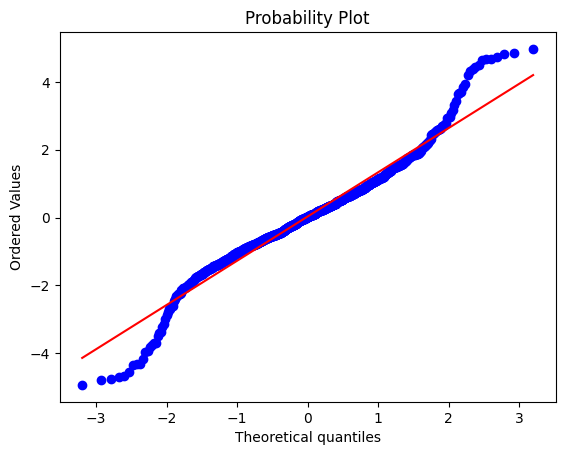

In [ ]:
stats.probplot(df['value'] , dist = 'norm' , plot = plt)
plt.show()

# **Hist Plot**

<Axes: xlabel='value', ylabel='Count'>

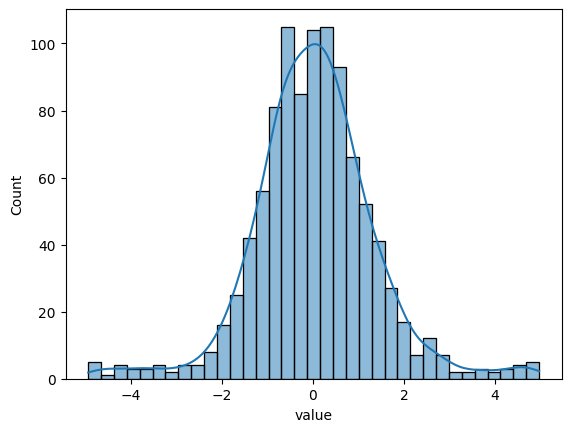

In [ ]:
sns.histplot(df['value'],kde=True)

In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate a DataFrame with random data
data = {
    'Feature1': np.random.uniform(1, 100, 1000),  # Uniform distribution between 1 and 100
    'Feature2': np.random.normal(50, 15, 1000),   # Normal distribution with mean 50 and std 15
    'Feature3': np.random.exponential(20, 1000)   # Exponential distribution with lambda = 1/20
}

df = pd.DataFrame(data)

# Display first few rows of the DataFrame

#FUNCTION TRANSFORMER
 - For Mathamatical Trans
 - Like log , square root  , expo etc

In [ ]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [ ]:
ft = FunctionTransformer(np.log1p)

In [ ]:
feature1 = ft.fit_transform(df['Feature1'])

**PLOTTING BEFORE AND AFTER**

In [ ]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-41-e4f6c45e1323>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


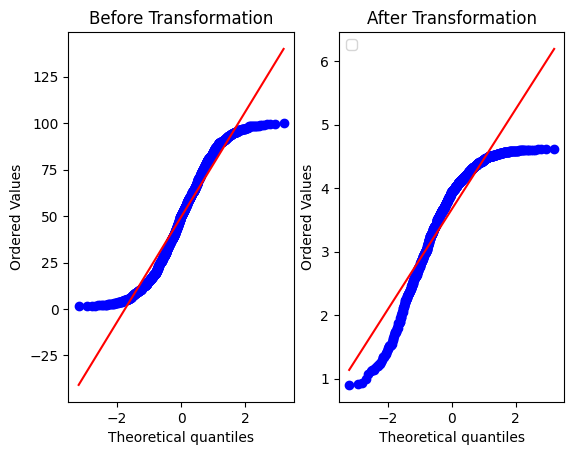

In [ ]:
fig , axis = plt.subplots(1,2)
sts.probplot(df['Feature1'] , dist = 'norm' , plot = axis[0]  )
sts.probplot(feature1 , dist = 'norm' ,plot = axis[1] )
axis[0].set_title("Before Transformation")
axis[1].set_title("After Transformation")
plt.legend()
plt.show()

#BOX COX

In [ ]:
from sklearn.preprocessing import PowerTransformer
col = df.iloc[:,0]
p = PowerTransformer(method = 'box-cox') # by defualt yeo-johnson
dta  = p.fit_transform(col.values.reshape(1000,1)) # -1 ,  1 for 2d

In [ ]:
pd.DataFrame(
    {'cols' : "Feature1" , 'lambdas' : p.lambdas_}
)

#MEANS FOR EVERY VALUE OF FEATURE ONE TRANS  IS : (VALUE)^LAMBDA , HERE LAMBDA : 0.68077
# EXAMPLE (38.0794)^0.68077


,cols,lambdas
0,Feature1,0.680777


# YEO-JOHNSON

In [ ]:
P = PowerTransformer() # most times yeo john son works good then box cox
# by default yeo johnson
dfit = P.fit_transform(df.iloc[:,1].values.reshape(1000,1))
p.lambdas_

array([0.68077721])

<ipython-input-64-8bbcc4844e7b>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


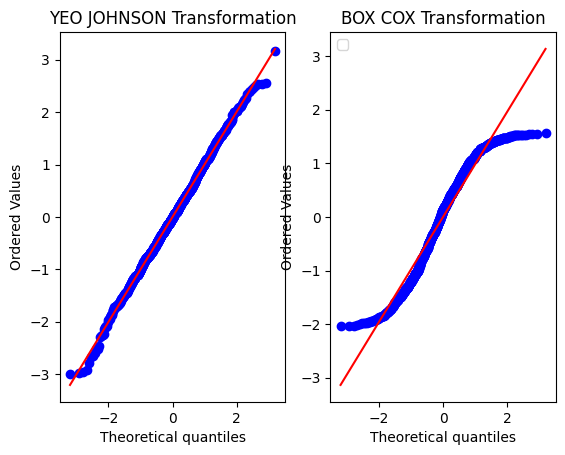

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as sts
fig , axis = plt.subplots(1,2)
sts.probplot(dfit.ravel() , dist = 'norm' , plot = axis[0]  )
sts.probplot(dta.ravel(), dist = 'norm' ,plot = axis[1] )
axis[0].set_title("YEO JOHNSON Transformation")
axis[1].set_title("BOX COX Transformation")
plt.legend()
plt.show()

